In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv


def load_full_color():
    full=cv.imread('C:\\Users\\HP\\CVPython\\data\\little.jpg',1)
    full=cv.cvtColor(full,cv.COLOR_BGR2RGB)
    return full

def load_part_color():
    face=cv.imread('C:\\Users\\HP\\CVPython\\data\\face.jpg',1)
    face=cv.cvtColor(face,cv.COLOR_BGR2RGB)
    return face



def temp_detection():
    full=load_full_color()
    face=load_part_color()
    methods=['cv.TM_CCOEFF','cv.TM_CCOEFF_NORMED','cv.TM_CCORR','cv.TM_CCORR_NORMED','cv.TM_SQDIFF','cv.TM_SQDIFF_NORMED']
    for m in methods:
        #create a copy
        full_copy=full.copy()
        methods=eval(m)
        #template maching
        res=cv.matchTemplate(full_copy,face,methods)
        min_val,max_val,min_loc,max_loc=cv.minMaxLoc(res)
    
        if methods in [cv.TM_SQDIFF,cv.TM_SQDIFF_NORMED]:
            top_left=min_loc
        else:
            top_left=max_loc
    
        height,width,chanel=face.shape
        bottom_right=(top_left[0]+width,top_left[1]+height)
        cv.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
        #plot and show img
        plt.subplot(121)
        plt.imshow(res)
        plt.title('Heat map template')
    
        plt.subplot(122)
        plt.imshow(full_copy)
        plt.title('Detection of template')
    
        plt.suptitle(m)
        plt.show()
        print('\n')
        print('\n')
    

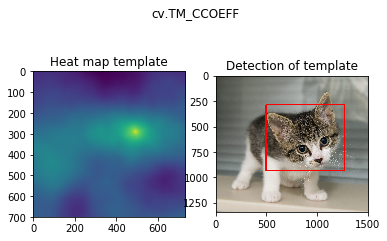

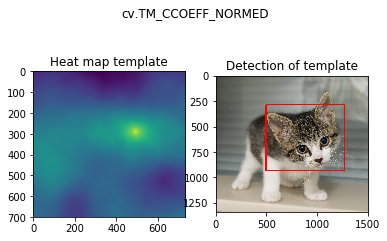

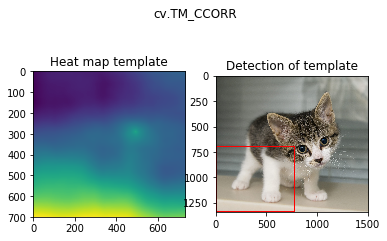

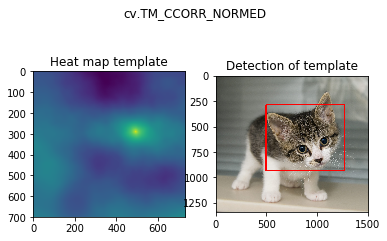

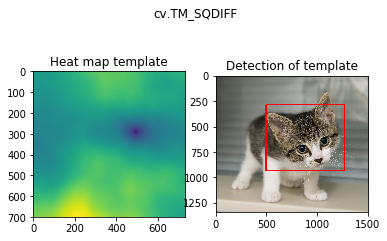

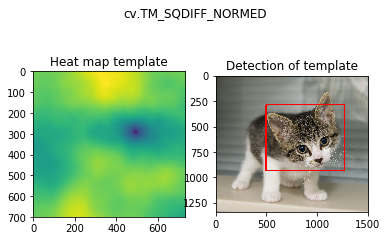

In [2]:
temp_detection()